This project uses data on the Los Angeles Dodgers Major League Baseball (MLB) team.

The data was explored and used to recommend to the Dodgers's management to improve fan attendance. Python was used for the analysis. 

I first imported the data, looked at the average attendance, then looked into the correlations of the different variables. Then created histograms of the different frequencies of the histograms. Then below that I looked at the min, max, and average attendance numbers for different types of games. Finally I had my recommendation to management. 

In [1]:
#Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

C:\Users\mksis\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
#Import data set
df = pd.read_csv('C:/Users/mksis/Documents/Data Science/DS630 Predictive Analytics/Data Sets/dodgers-2022.csv')
df.head()

,month,day,attend,day_of_week,opponent,temp,skies,day_night,cap,shirt,fireworks,bobblehead,month_num
0,APR,10,56000,Tuesday,Pirates,67,Clear,Day,NO,NO,NO,NO,4
1,APR,11,29729,Wednesday,Pirates,58,Cloudy,Night,NO,NO,NO,NO,4
2,APR,12,28328,Thursday,Pirates,57,Cloudy,Night,NO,NO,NO,NO,4
3,APR,13,31601,Friday,Padres,54,Cloudy,Night,NO,NO,YES,NO,4
4,APR,14,46549,Saturday,Padres,57,Cloudy,Night,NO,NO,NO,NO,4


In [3]:
df.describe()

#average attendance was ~41,000 people, with the lowest attendance at ~24,000 and the highest attendance at ~56,000.

,day,attend,temp,month_num
count,81.000000,81.000000,81.000000,81.000000
mean,16.135802,41040.074074,73.148148,6.592593
std,9.605666,8297.539460,8.317318,1.821934
min,1.000000,24312.000000,54.000000,4.000000
25%,8.000000,34493.000000,67.000000,5.000000
50%,15.000000,40284.000000,73.000000,7.000000
75%,25.000000,46588.000000,79.000000,8.000000
max,31.000000,56000.000000,95.000000,10.000000


<AxesSubplot:>

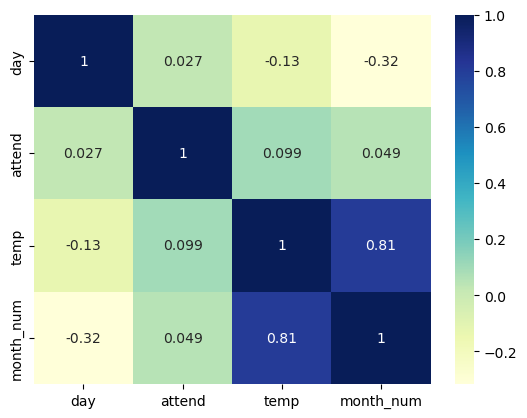

In [4]:
#Creating correlation matrix based off of columns with numerical values.
corr_matrix = df.corr()

sb.heatmap(corr_matrix, annot = True, cmap = 'YlGnBu')
#From this matrix, you can see that attendance had the strongest correlation to temperature 
# compared to day or month_num.

In [5]:
#column names
col_names = list(df.columns)
col_names

['month',
 'day',
 'attend',
 'day_of_week',
 'opponent',
 'temp',
 'skies',
 'day_night',
 'cap',
 'shirt',
 'fireworks',
 'bobblehead',
 'month_num']

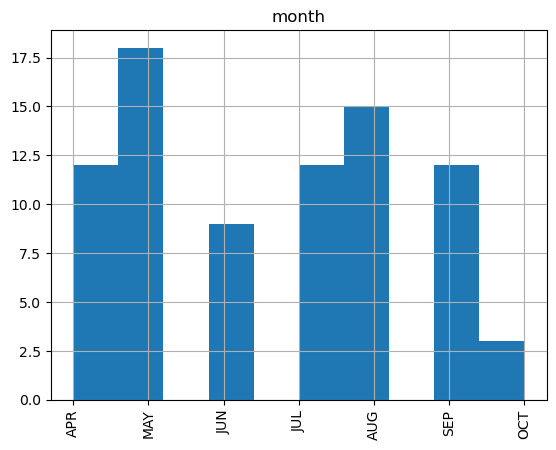

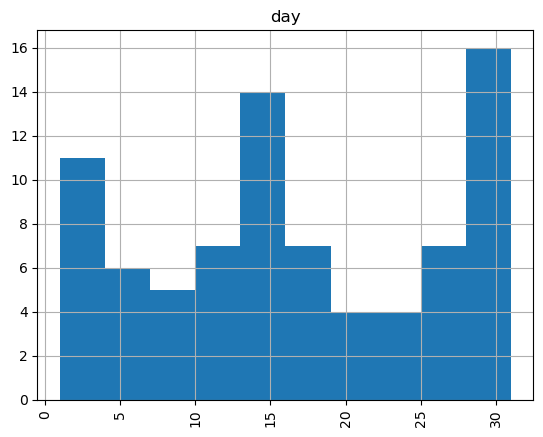

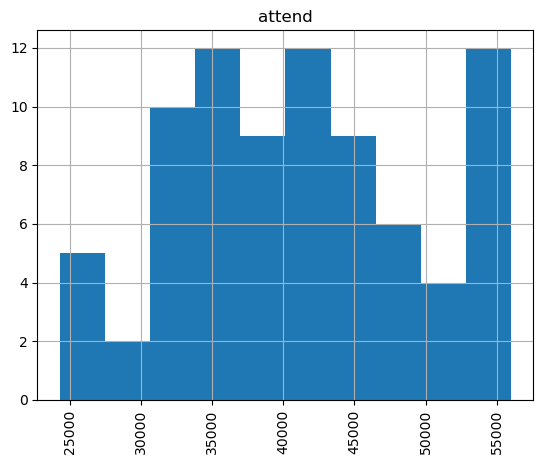

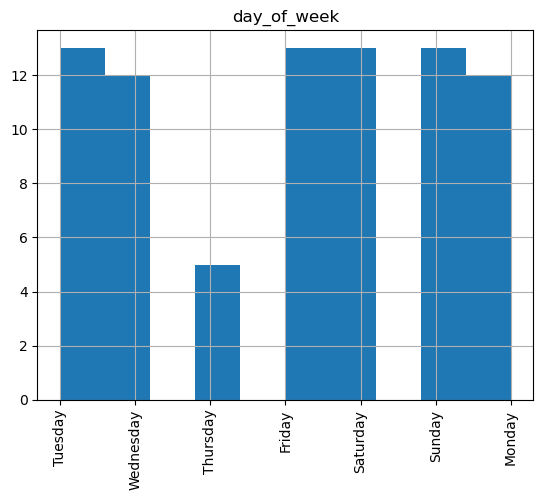

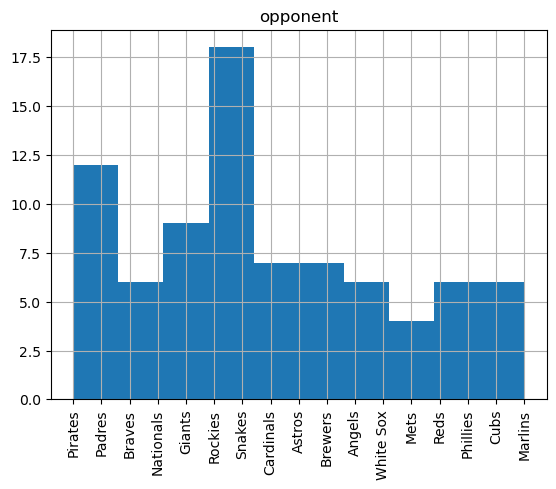

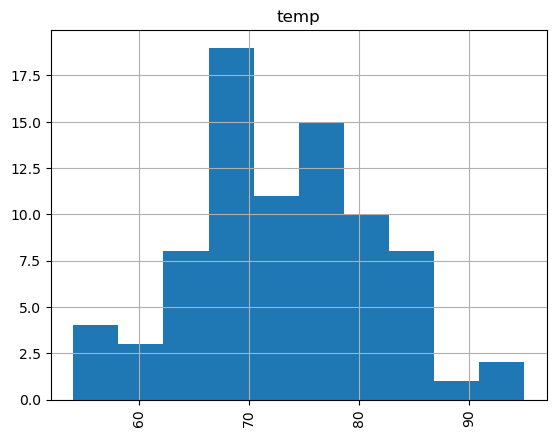

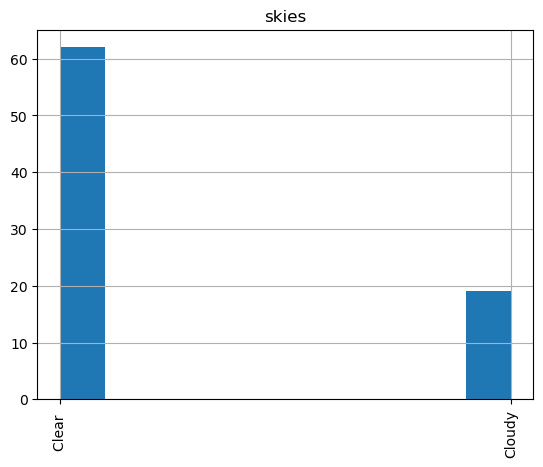

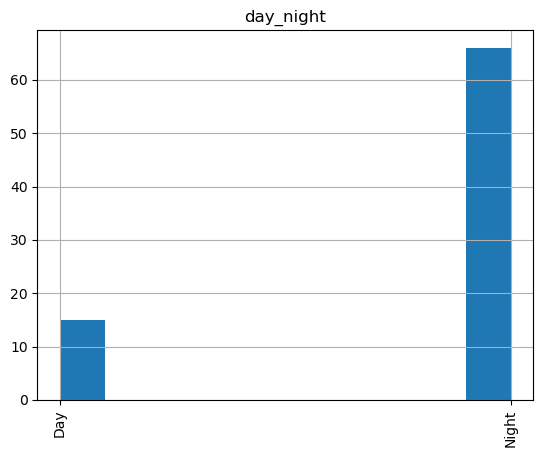

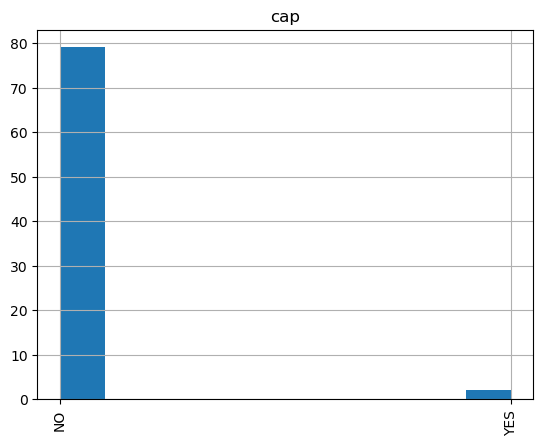

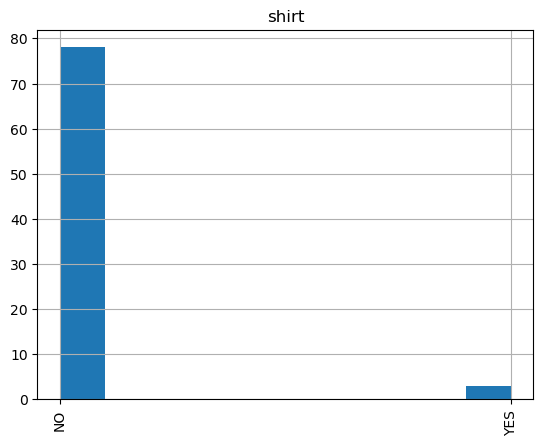

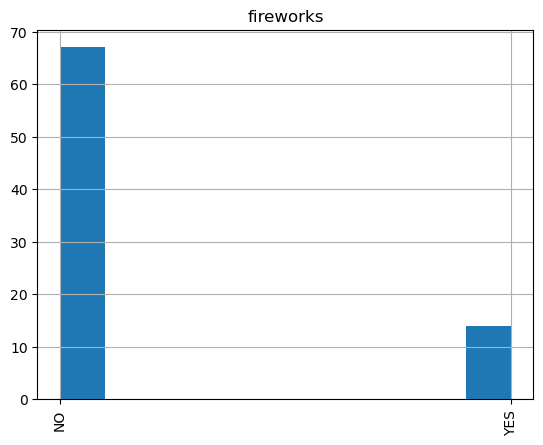

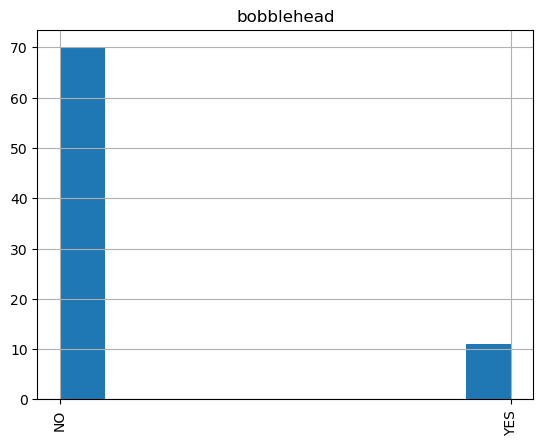

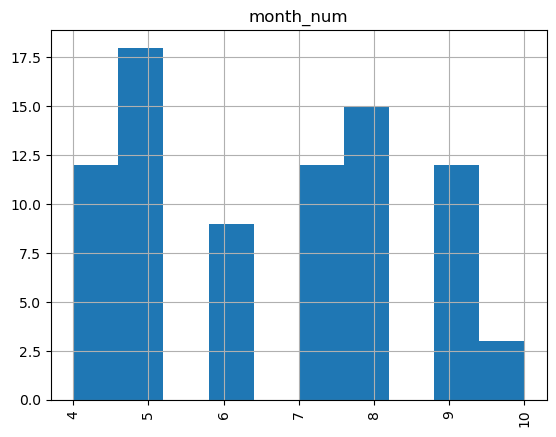

In [6]:
#Create histograms for each column

for i in col_names:
    df[i].hist()
    plt.title(i)
    plt.xticks(rotation = 'vertical')
    plt.show()

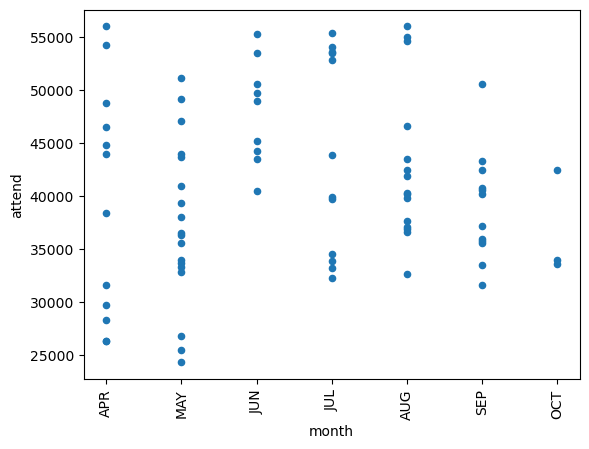

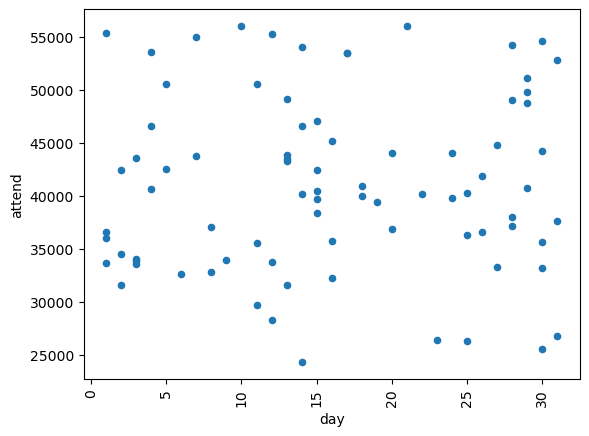

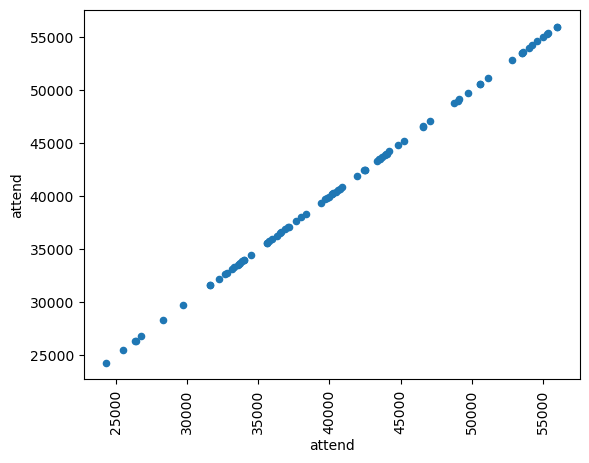

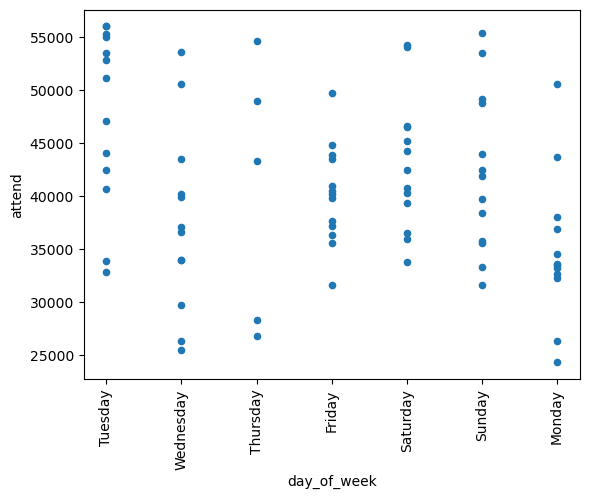

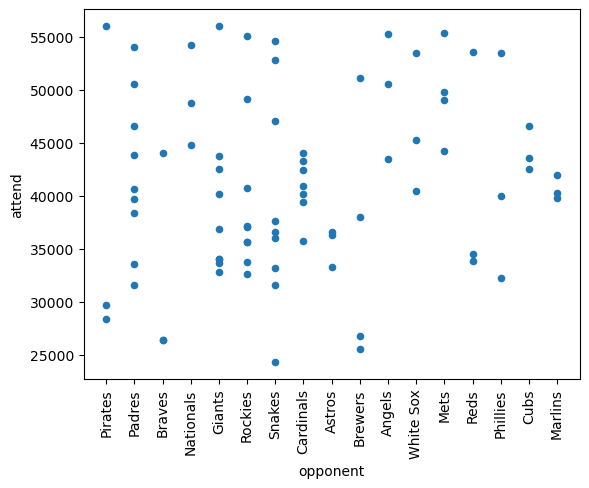

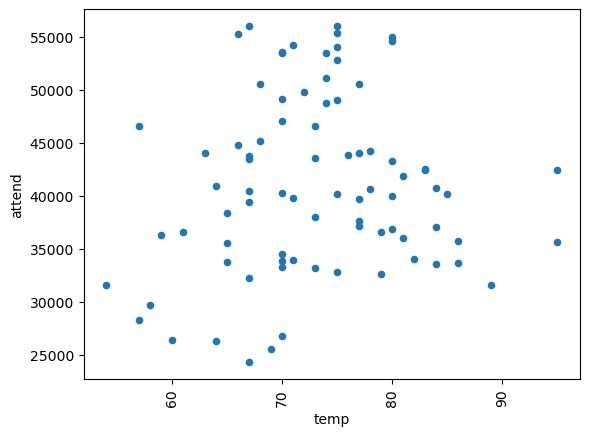

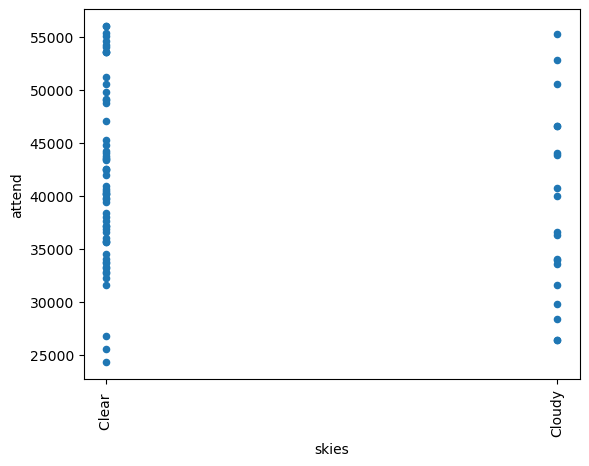

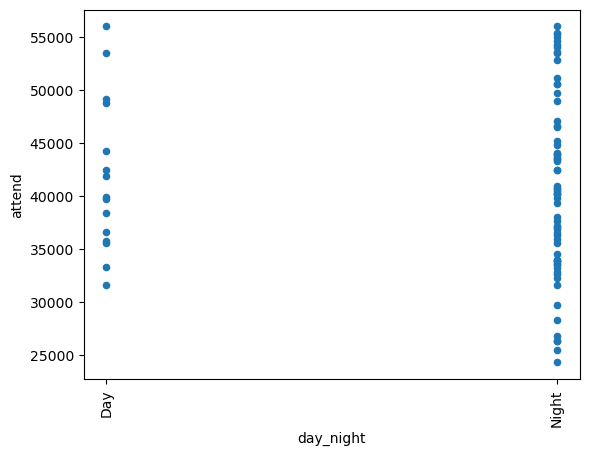

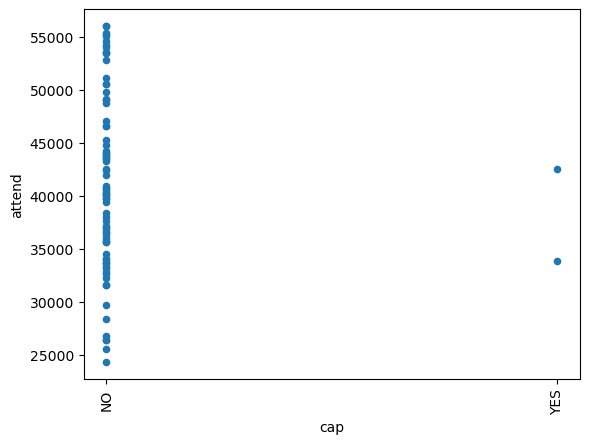

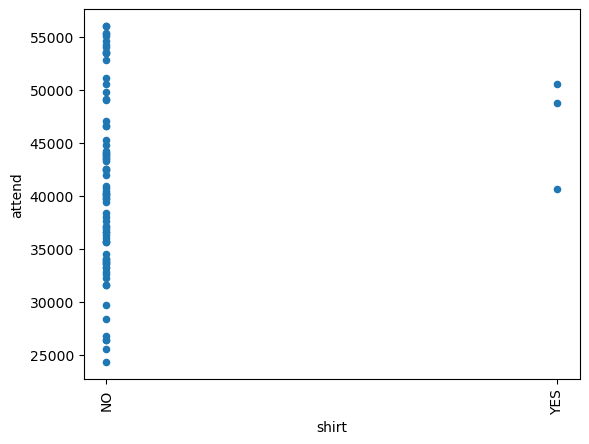

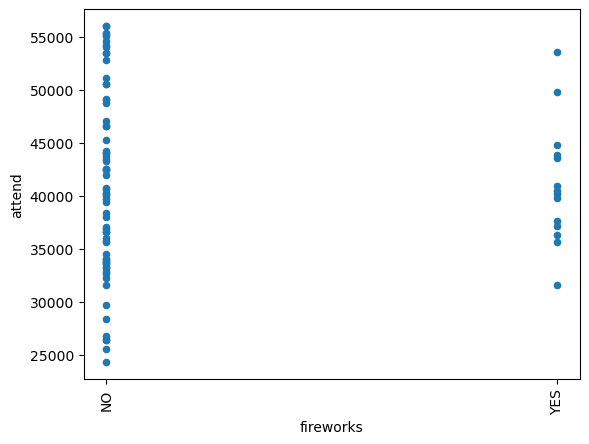

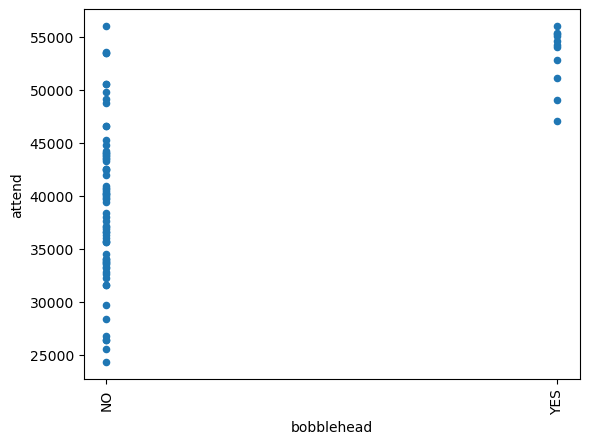

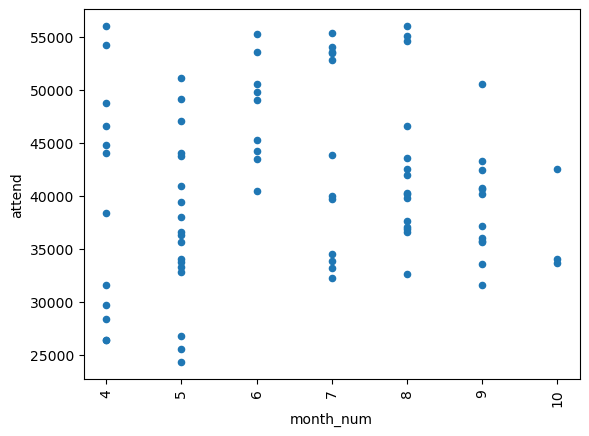

In [7]:
#Create scatter plots to compare column values with game attendance.

for i in col_names:
    df.plot(kind = 'scatter', x = i, y = 'attend', rot = 'vertical')
    

In [8]:
#Find mean, min, max, median of the attendance for the columns 'shirt', 'fireworks', 'bobblehead', 'month', 'day_of_week', 'opponent'
# See if there are any patterns from this aggregation.

#Create a for loop to view aggregated statistics for the different columns of interst
group_col = ['shirt', 'fireworks', 'bobblehead', 'cap', 'month', 'day_of_week', 'opponent']

for i in group_col:
    print(df.groupby(i).agg({'attend': ['mean', 'median', 'min', 'max', 'count']}))

    
#From the groupby function, able to see the following trends:
#Shirts: Mean attendance on days of shirts was approximately 6,000 higher than the average (41k).
#Fireworks: The mean and median on days with and without fireworks were not too different, not statistically significant.
#Bobblehead: The mean and median attendance on days with bobbleheads were approximately 12,000 higher than the average (41k).
#Cap: The mean on days with cap giveaways was ~3,000 lower than the average (41k)
#Month: June had the highest attendance mean (~48k) and October had the lowest attendance mean (36.7k)
#Day of the Week: Tuesday had the highest attendance mean (~48k) and Monday had the lowest attendance mean (~35k)
#Opponent: The Angels, Mets, and Nationals had the highest attendance means all at approximately 49k.  The Braves, Astros, and Brewers 
          # had the lowest attendance means with about ~35k.

             attend                             
               mean   median    min    max count
shirt                                           
NO     40824.551282  40170.0  24312  56000    78
YES    46643.666667  48753.0  40619  50559     3
                 attend                             
                   mean   median    min    max count
fireworks                                           
NO         41032.179104  40284.0  24312  56000    67
YES        41077.857143  40299.5  31601  53570    14
                  attend                             
                    mean   median    min    max count
bobblehead                                           
NO          39137.928571  39549.0  24312  56000    70
YES         53144.636364  54242.0  47077  56000    11
           attend                             
             mean   median    min    max count
cap                                           
NO   41112.240506  40284.0  24312  56000    79
YES  38189.500000  38189.5  3388

In [9]:
#Create dummy variables for variables with string values

#dummy_col = ['month', 'day', 'day_of_week', 'opponenet', 'skies', 'day_night', 'cap', 'shirt', 'fireworks', 'bobblehead', 'month_num']

#Creating dummy variables for df
df = pd.get_dummies(df)

In [10]:
#Create linear regression model

#Split data into X (independant) and y (dependent)

X = df.drop('attend', axis = 1) #drop feature of attendance, also dropped columns with strings as values
y = df['attend'] #dependent variable of attendance

#View shape of the X and y data sets
X.shape, y.shape

((81, 46), (81,))

In [11]:
#Split the data into training and testing data sets
#Randomize the data
#Split test to 20% and training to 80%

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state= 42)

print('Training set shape: ', X_train.shape, y_train.shape)
print('Testing set shape: ', X_test.shape, y_test.shape )

Training set shape:  (64, 46) (64,)
Testing set shape:  (17, 46) (17,)


In [12]:
lr = LinearRegression()

In [13]:
#Train linear regression model on the training set
lr.fit(X_train, y_train)

LinearRegression()

In [14]:
#Predict on the test set
#y_preds are predicted values based on features
y_pred = lr.predict(X_test)
y_pred

array([38550.09621438, 33539.86990335, 43098.67542947, 61660.87995025,
       29917.11424436, 34129.91262463, 56060.68070077, 37768.79798794,
       34430.87328927, 29459.63893327, 34196.43986403, 44295.51946271,
       36976.90458127, 47989.07851723, 34087.86990151, 47172.49966454,
       37612.48140391])

In [15]:
#Import library to find metrics for model
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

r2 = r2_score(y_test, y_pred) #varaince of dependent variable explained by independent variables. Higer = better
print('R2 score: ', r2)
#R2 is .12, meaning it is not a very good R2 score, the model isn't very strong.

mse = mean_squared_error(y_test, y_pred) #average squared distance between predicted and actual values. Lower = better
print('Mean Squared Error: ', mse)


mae = mean_absolute_error(y_test, y_pred) #average absolute distance between predicted and actual values. Lower = better
print('Mean Absolute Error: ', mae)


R2 score:  0.12209095246023949
Mean Squared Error:  86317926.8756645
Mean Absolute Error:  7386.547606778323


Text(0.5, 1.0, 'Predicted vs Actual Vales')

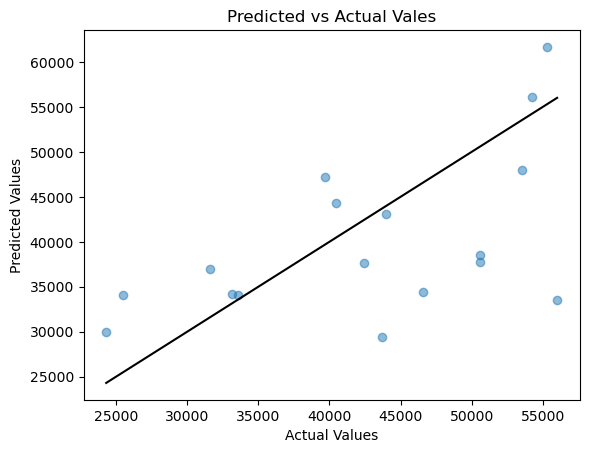

In [16]:
plt.scatter(y_test, y_pred, alpha = .5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color = 'black' )
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual Vales')